# Danial Azimi - 99222075

In [287]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/snappfood-persian-sentiment-analysis/Snappfood - Sentiment Analysis.csv
/kaggle/input/farsi-font/B-NAZANIN.TTF


# Importing data

In [288]:
snapp_data = pd.read_csv('/kaggle/input/snappfood-persian-sentiment-analysis/Snappfood - Sentiment Analysis.csv' , on_bad_lines='skip' , delimiter='\t')
snapp_data.head()

,Unnamed: 0,comment,label,label_id
0,NaN,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1.0
1,NaN,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0.0
2,NaN,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1.0
3,NaN,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0.0
4,NaN,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0.0


In [289]:
snapp_data = snapp_data[['comment' , 'label' , 'label_id']]

In [290]:
snapp_data.sample(3)

,comment,label,label_id
9915,قرمه سبزی بسیار بی مزه بدون هیچ طعمی بدون نمک،...,SAD,1.0
61030,بد بود همه چی مونده بود,SAD,1.0
10738,کیفیت ساندویچ‌ها نسبت به بار اول خیلی خیلی کم شده,SAD,1.0


In [291]:
snapp_data.dropna(inplace=True)

In [292]:
snapp_data['label_id'] = snapp_data['label_id'].astype(int)
snapp_data.head()

,comment,label,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0


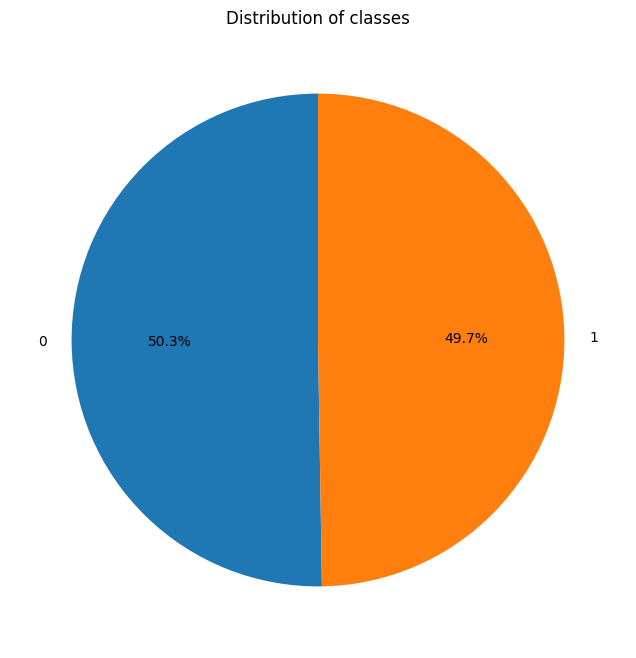

In [293]:
import matplotlib.pyplot as plt

labels = snapp_data['label_id'].value_counts().index
sizes = snapp_data['label_id'].value_counts().values

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of classes')

# Display the chart
plt.show()

#### fortunately, data is balanced!

# EDA and Data Visualization

In [294]:
#!pip install wordcloud

In [295]:
!pip install hazm

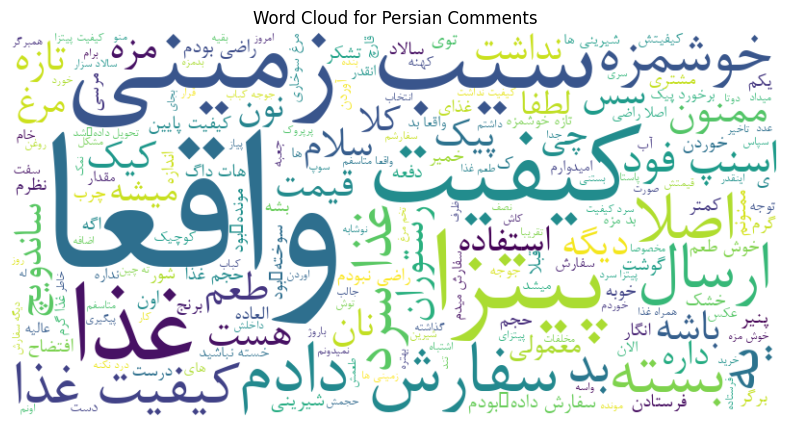

In [296]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from hazm import word_tokenize, stopwords_list

comments = " ".join(comment for comment in snapp_data['comment'] if isinstance(comment, str))

words = word_tokenize(comments)

stop_words = set(stopwords_list())
words = [word for word in words if word not in stop_words]

text = " ".join(words)

wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/kaggle/input/farsi-font/B-NAZANIN.TTF').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Persian Comments')
plt.show()


### Word Cloud for negative comments

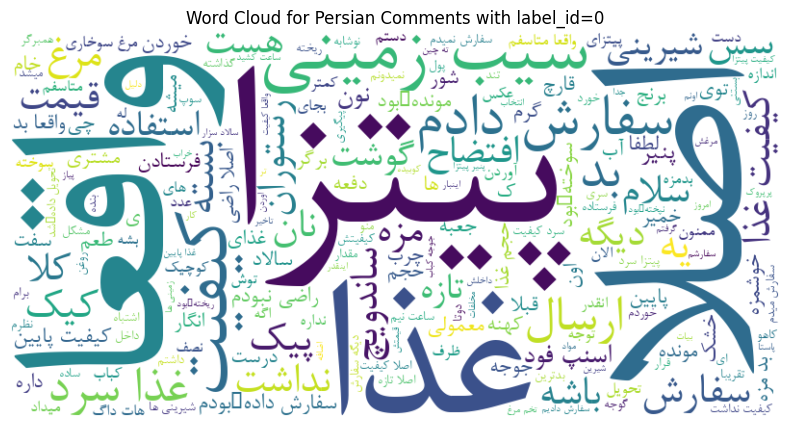

In [297]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from hazm import word_tokenize, stopwords_list

filtered_comments = " ".join(comment for comment, label_id in zip(snapp_data['comment'], snapp_data['label_id']) if isinstance(comment, str) and label_id == 1)


words = word_tokenize(filtered_comments)

stop_words = set(stopwords_list())
words = [word for word in words if word not in stop_words]

text = " ".join(words)

wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/kaggle/input/farsi-font/B-NAZANIN.TTF').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Persian Comments with label_id=0')
plt.show()


### Word Cloud for positive comments

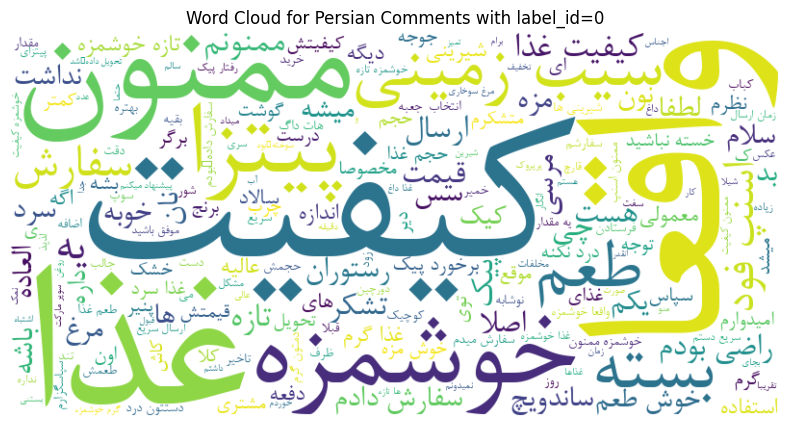

In [298]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from hazm import word_tokenize, stopwords_list

filtered_comments = " ".join(comment for comment, label_id in zip(snapp_data['comment'], snapp_data['label_id']) if isinstance(comment, str) and label_id == 0)

words = word_tokenize(filtered_comments)

stop_words = set(stopwords_list())
words = [word for word in words if word not in stop_words]

text = " ".join(words)

wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/kaggle/input/farsi-font/B-NAZANIN.TTF').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Persian Comments with label_id=0')
plt.show()


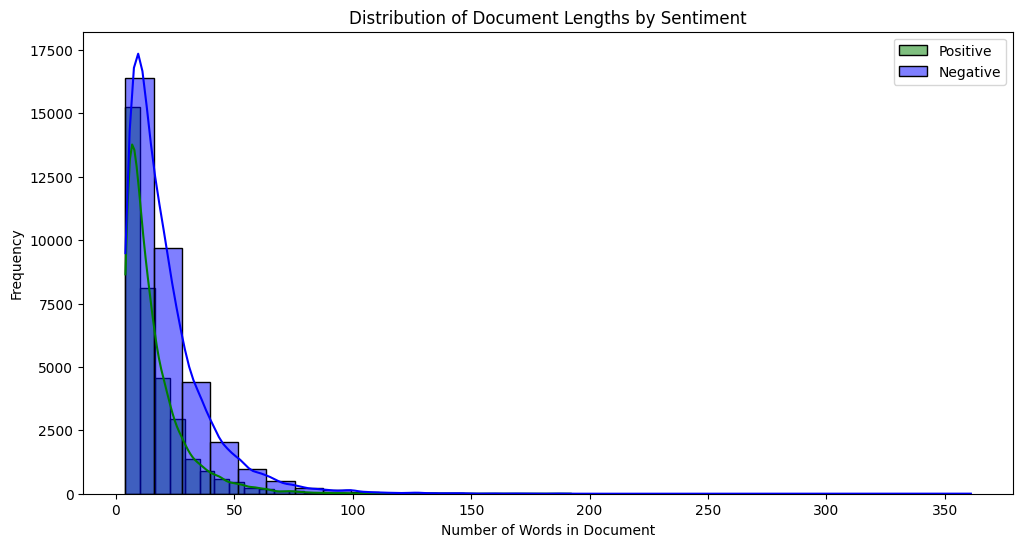

In [299]:
import seaborn as sns

positive_comments_lengths = [len(comment.split()) for comment, label_id in zip(snapp_data['comment'], snapp_data['label_id']) if label_id == 0]
negative_comments_lengths = [len(comment.split()) for comment, label_id in zip(snapp_data['comment'], snapp_data['label_id']) if label_id == 1]

# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.histplot(positive_comments_lengths, bins=30, kde=True, color='green', label='Positive')  
sns.histplot(negative_comments_lengths, bins=30, kde=True, color='blue', label='Negative')  

plt.title('Distribution of Document Lengths by Sentiment')
plt.xlabel('Number of Words in Document')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Observation: Negative comments tend to be shorter

## N-grams 

In [300]:
from hazm import word_tokenize
from nltk import ngrams
from collections import Counter

positive_comments = snapp_data[snapp_data['label_id'] == 0]['comment']
negative_comments = snapp_data[snapp_data['label_id'] == 1]['comment']

# Function to extract n-grams from a list of comments
def extract_ngrams(comment_list, n):
    all_ngrams = [ngram for comment in comment_list for ngram in ngrams(word_tokenize(comment), n)]
    return all_ngrams

## n == 1 :

In [301]:
# Extracting and counting n-grams
positive_ngrams = extract_ngrams(positive_comments, 1) # 1 here is n in n-gram!
negative_ngrams = extract_ngrams(negative_comments, 1)

# Counting occurrences of n-grams
positive_ngram_counts = Counter(positive_ngrams)
negative_ngram_counts = Counter(negative_ngrams)

# Display top 10 n-grams
top_positive_ngrams = positive_ngram_counts.most_common(10)
top_negative_ngrams = negative_ngram_counts.most_common(10)

print(top_positive_ngrams)
print('______________________________________________________________________________________________________________')
print(top_negative_ngrams)

[(('بود',), 28633), (('و',), 27578), (('.',), 21439), (('عالی',), 11633), (('خیلی',), 10852), (('به',), 10136), (('خوب',), 10036), (('از',), 9814), (('،',), 8985), (('هم',), 8831)]
______________________________________________________________________________________________________________
[(('و',), 31435), (('بود',), 25813), (('.',), 21844), (('که',), 13923), (('به',), 12648), (('از',), 12156), (('،',), 10332), (('غذا',), 9059), (('هم',), 8937), (('خیلی',), 8555)]


## n == 2 :

In [302]:
# Extracting and counting n-grams
positive_ngrams = extract_ngrams(positive_comments, 2) # 2 here is n in n-gram!
negative_ngrams = extract_ngrams(negative_comments, 2)

# Counting occurrences of n-grams
positive_ngram_counts = Counter(positive_ngrams)
negative_ngram_counts = Counter(negative_ngrams)

# Display top 10 n-grams
top_positive_ngrams = positive_ngram_counts.most_common(10)
top_negative_ngrams = negative_ngram_counts.most_common(10)

print(top_positive_ngrams)
print('______________________________________________________________________________________________________________')
print(top_negative_ngrams)

[(('خوب', 'بود'), 6237), (('بود', '.'), 5665), (('عالی', 'بود'), 5197), (('بود', 'و'), 2870), (('خوشمزه', 'بود'), 2437), (('مثل', 'همیشه'), 2197), (('بود', '،'), 1953), (('خیلی', 'خوب'), 1880), (('بود', 'ولی'), 1835), (('به', 'موقع'), 1689)]
______________________________________________________________________________________________________________
[(('بود', '.'), 4365), (('بود', 'و'), 3459), (('سرد', 'بود'), 1840), (('سفارش', 'دادم'), 1835), (('بد', 'بود'), 1801), (('بود', 'که'), 1673), (('سیب', 'زمینی'), 1671), (('خوب', 'بود'), 1623), (('بود', '،'), 1569), (('بی', 'کیفیت'), 1480)]


## n == 3 :

In [303]:
# Extracting and counting n-grams
positive_ngrams = extract_ngrams(positive_comments, 3) 
negative_ngrams = extract_ngrams(negative_comments, 3)
# print(positive_ngrams[1:10])

# Counting occurrences of n-grams
positive_ngram_counts = Counter(positive_ngrams)
negative_ngram_counts = Counter(negative_ngrams)

# Display top 10 n-grams
top_positive_ngrams = positive_ngram_counts.most_common(10)
top_negative_ngrams = negative_ngram_counts.most_common(10)

print(top_positive_ngrams)
print('______________________________________________________________________________________________________________')
print(top_negative_ngrams)

[(('خیلی', 'خوب', 'بود'), 1295), (('خوب', 'بود', '.'), 1233), (('عالی', 'بود', '.'), 1019), (('به', 'دستم', 'رسید'), 928), (('خوب', 'بود', 'ولی'), 784), (('مثل', 'همیشه', 'عالی'), 756), (('و', 'خوشمزه', 'بود'), 673), (('و', 'به', 'موقع'), 570), (('به', 'موقع', 'رسید'), 542), (('غذا', 'خوب', 'بود'), 535)]
______________________________________________________________________________________________________________
[(('خیلی', 'بد', 'بود'), 649), (('اصلا', 'خوب', 'نبود'), 618), (('به', 'دستم', 'رسید'), 533), (('بی', 'کیفیت', 'بود'), 511), (('از', 'این', 'رستوران'), 446), (('خوب', 'بود', 'ولی'), 433), (('سرد', 'بود', 'و'), 420), (('با', 'توجه', 'به'), 399), (('قابل', 'خوردن', 'نبود'), 391), (('یک', 'ساعت', 'و'), 389)]


## n == 4 :

In [304]:
# Extracting and counting n-grams
positive_ngrams = extract_ngrams(positive_comments, 4)
negative_ngrams = extract_ngrams(negative_comments, 4)
# print(positive_ngrams[1:10])

# Counting occurrences of n-grams
positive_ngram_counts = Counter(positive_ngrams)
negative_ngram_counts = Counter(negative_ngrams)

# Display top 10 n-grams
top_positive_ngrams = positive_ngram_counts.most_common(10)
top_negative_ngrams = negative_ngram_counts.most_common(10)

print(top_positive_ngrams)
print('______________________________________________________________________________________________________________')
print(top_negative_ngrams)

[(('خیلی', 'خوب', 'بود', '.'), 291), (('به', 'دستم', 'رسید', '.'), 262), (('مثل', 'همیشه', 'عالی', 'بود'), 226), (('تازه', 'و', 'خوشمزه', 'بود'), 222), (('در', 'کل', 'خوب', 'بود'), 205), (('و', 'به', 'موقع', 'رسید'), 203), (('کیفیت', 'غذا', 'خوب', 'بود'), 199), (('و', 'خوشمزه', 'بود', '.'), 186), (('همه', 'چیز', 'عالی', 'بود'), 169), (('همه', 'چی', 'عالی', 'بود'), 154)]
______________________________________________________________________________________________________________
[(('یک', 'ساعت', 'و', 'نیم'), 190), (('و', 'بی', 'کیفیت', 'بود'), 173), (('بعد', 'از', 'یک', 'ساعت'), 157), (('اصلا', 'خوب', 'نبود', '.'), 135), (('از', 'یک', 'ساعت', 'و'), 124), (('سرد', 'به', 'دستم', 'رسید'), 124), (('غذا', 'کاملا', 'سرد', 'بود'), 121), (('اصلا', 'قابل', 'خوردن', 'نبود'), 116), (('از', 'این', 'رستوران', 'سفارش'), 109), (('بی', 'کیفیت', 'بود', '.'), 108)]


### After experimenting n-grams of size 1, 2, 3 and 4, I think (n == 2) gives the most insightful combinations!

### Experiment: Adding 2 grams result to the dataset

In [305]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer

# # Use CountVectorizer to convert the 'comment' column into a bag-of-words representation with n-grams
# vectorizer = CountVectorizer(ngram_range=(1, 2) , max_features=500)  # You can adjust the n-gram range
# X_vectorized = vectorizer.fit_transform(snapp_data['comment'])

# # Create a DataFrame with the vectorized features
# ngram_df = pd.DataFrame(X_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

# # Concatenate the original DataFrame with the new n-gram DataFrame
# df_with_ngrams = pd.concat([snapp_data, ngram_df], axis=1)

# # Display the updated DataFrame
# print(df_with_ngrams)

### there are some computational complexities to do this, so I will ignore it for now!

# Train/Validation Split

In [306]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [307]:
X = (snapp_data['comment'])
y = (snapp_data['label_id'])

In [308]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

# Tokenizing with TF-IDF

In [309]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_train)

In [310]:
X_val = vectorizer.transform(X_val)

# Modeling

In [311]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Multinomial Naive Bayes

In [312]:
nb = MultinomialNB()
nb.fit(X, y_train)

MultinomialNB()

In [313]:
y_pred = nb.predict(X_val)
print(classification_report(y_val , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      8752
           1       0.79      0.91      0.84      8618

    accuracy                           0.83     17370
   macro avg       0.84      0.83      0.83     17370
weighted avg       0.84      0.83      0.83     17370



## XGB Classifier

In [314]:
xgb = XGBClassifier()
xgb.fit(X , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [315]:
y_pred = xgb.predict(X_val)
print(classification_report(y_val , y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      8752
           1       0.80      0.91      0.85      8618

    accuracy                           0.85     17370
   macro avg       0.85      0.85      0.84     17370
weighted avg       0.85      0.85      0.84     17370



## Logistic Regression

In [316]:
lr = LogisticRegression()
lr.fit(X, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [317]:
y_pred = lr.predict(X_val)
print(classification_report(y_val , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      8752
           1       0.82      0.90      0.86      8618

    accuracy                           0.85     17370
   macro avg       0.86      0.85      0.85     17370
weighted avg       0.86      0.85      0.85     17370



## Logistic Regression has the best performance among these models! (by just a percent)

## Random Forest

In [318]:
rf = RandomForestClassifier()
rf.fit(X, y_train)

RandomForestClassifier()

In [319]:
y_pred = rf.predict(X_val)
print(classification_report(y_val , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      8752
           1       0.81      0.90      0.85      8618

    accuracy                           0.85     17370
   macro avg       0.85      0.85      0.85     17370
weighted avg       0.85      0.85      0.85     17370



# Further Analysis

## TF-IDF + SVD

### Using SVD can help reduce noise and is helpful for LSA (Latent Semantic Analysis) as well as reducing the dimentionality of the data! So we will test it:

In [320]:
from sklearn.decomposition import TruncatedSVD

In [321]:
svd = TruncatedSVD(n_components=80) 
X_train_svd = svd.fit_transform(X)
X_val_svd = svd.transform(X_val)

In [322]:
xgb = XGBClassifier()
xgb.fit(X_train_svd , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [323]:
y_pred = xgb.predict(X_val_svd)
print(classification_report(y_val , y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      8752
           1       0.80      0.87      0.83      8618

    accuracy                           0.83     17370
   macro avg       0.83      0.83      0.83     17370
weighted avg       0.83      0.83      0.83     17370



In [324]:
lr = LogisticRegression()
lr.fit(X_train_svd, y_train)

LogisticRegression()

In [325]:
y_pred = lr.predict(X_val_svd)
print(classification_report(y_val , y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      8752
           1       0.79      0.88      0.84      8618

    accuracy                           0.83     17370
   macro avg       0.83      0.83      0.83     17370
weighted avg       0.83      0.83      0.83     17370



## It actually worsen the results, meaning that it has deleted more signal than noise from data!

# Additional Feature Engineerings

### Adding the length of each text as a new column to the dataset (as observed in EDA step)

In [326]:
snapp_data.head()

,comment,label,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0


In [327]:
snapp_data['comment_length'] = snapp_data['comment'].apply(len)

In [328]:
snapp_data.head()

,comment,label,label_id,comment_length
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1,47
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0,146
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1,89
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0,101
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0,29


In [329]:
X = snapp_data[['comment', 'comment_length']]
y = snapp_data['label_id']

In [330]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [331]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['comment'])
X_val_tfidf = vectorizer.transform(X_val['comment'])

In [333]:
from scipy.sparse import hstack

In [ ]:
X_train_final = hstack([X_train_tfidf, X_train['comment_length'].values.reshape(-1, 1)])
X_val_final = hstack([X_val_tfidf, X_val['comment_length'].values.reshape(-1, 1)])

In [334]:
# Train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_final, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [335]:
y_pred = lr.predict(X_val_final)
print(classification_report(y_val , y_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      8833
           1       0.82      0.91      0.86      8537

    accuracy                           0.85     17370
   macro avg       0.86      0.85      0.85     17370
weighted avg       0.86      0.85      0.85     17370



In [336]:
xgb = XGBClassifier()
xgb.fit(X_train_final , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [338]:
y_pred = xgb.predict(X_val_final)
print(classification_report(y_val , y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      8833
           1       0.81      0.91      0.85      8537

    accuracy                           0.85     17370
   macro avg       0.85      0.85      0.85     17370
weighted avg       0.85      0.85      0.85     17370



In [339]:
nb = MultinomialNB()
nb.fit(X_train_final, y_train)

MultinomialNB()

In [340]:
y_pred = nb.predict(X_val_final)
print(classification_report(y_val , y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      8833
           1       0.77      0.92      0.84      8537

    accuracy                           0.82     17370
   macro avg       0.83      0.82      0.82     17370
weighted avg       0.84      0.82      0.82     17370



### This feature actually improved the result by about one percent on some criteria like LR, but it did the opposite for some other criteria like NB, so this will not be used for them!